A characteristics of many neural networks such as densely connected networks or covnets is that they ave no memory. Each input shown to them is processed independently with no state kept in between inputs. In order to process sequences with these networks the whole sequence must be fed into the network at one and turn it to a single data point. They are what is called *feedforeward networks*.

*Recurrent Neural Networks* solve this problem by processesing sequences by iterating through the sequence elements and maintaining a *state* containing information relative to what it has seen so far. In essence an RNN is a type of neural network that has an internal loop and the state of the rnn is reset between processing two different independent sequences. This means that a single sequence is considered a single data point. What changes is that this data point is no longer processed in a single step, rather the network will internally loop over the sequence elements.

In [2]:
# Numpy Implementation of a Simple RNN

In [9]:
import numpy as np

# Set the number of timesteps in the input sequence
timesteps = 100
# Dimensionality of the input feature space; number of features
input_features = 32
# Dimensionality of the output feature space
output_features = 64

# Input data: random noise
inputs = np.random.random((timesteps, input_features))
# Initial state: all zeros
state_t = np.zeros((output_features,))

# Random weight matricies
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

# The input_t is a vector of shape (input_features,)
sucessive_outputs = []
for input_t in inputs:
    # Combines the input with the current state (previous output)
    # to obtain the current outputl this is the step function that
    # characterizes RNNs
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # Stores this output in a list
    sucessive_outputs.append(output_t)
    # Updates the state of the network for the next step
    state_t = output_t

# The output of the RNN is a 2D tensor with shape (timesteps, output_features)
final_output_sequence = np.concatenate(sucessive_outputs, axis = 0)

# Application
We will apply an RNN to the IMDB dataset

In [11]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [23]:
max_features = int(1e4)
maxlen = int(5e2)
batch_size = 32

In [24]:
print ('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [25]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [26]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', np.shape(input_train))
print('input_test shape:', np.shape(input_test))

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


# Creating the network

In [33]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.5885 - acc: 0.6738 - val_loss: 0.4172 - val_acc: 0.8206
Epoch 2/10
20000/20000 [==============================] - 20s 995us/step - loss: 0.3658 - acc: 0.8501 - val_loss: 0.3535 - val_acc: 0.8544
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2565 - acc: 0.9013 - val_loss: 0.3267 - val_acc: 0.8728
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1932 - acc: 0.9278 - val_loss: 0.3710 - val_acc: 0.8422
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1315 - acc: 0.9534 - val_loss: 0.4874 - val_acc: 0.7892
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0849 - acc: 0.9723 - val_loss: 0.4180 - val_acc: 0.8558
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0548 - acc: 0.9833 - val_loss: 0.5402 - val_ac

# Plot the results
We can see accuracy is around. 85%. The problem could be the maxlen is 500 words rather than the full reviews them selves. Unfortunately we can't use SimpleRNN to process long sequeneces like text.

In [38]:
import matplotlib.pyplot as plt

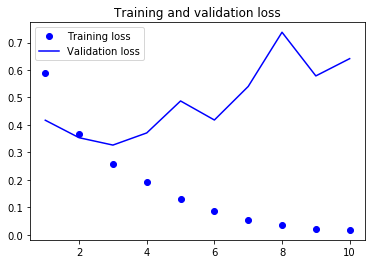

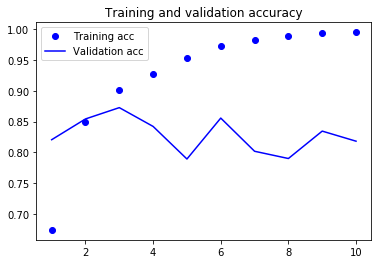

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()